<a href="https://colab.research.google.com/github/Mandallaz/covid-19/blob/master/Covid_19_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The John Hopkins University is pushing to a [github repository](https://github.com/CSSEGISandData) daily raw numbers on the COVID-19:

    * number of confirmed cases
    * number of deads
    * number of recoveries

# **Get the raw data via github**

In [1]:
root_git = 'https://github.com/CSSEGISandData/COVID-19.git'
!git clone $root_git

Cloning into 'COVID-19'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20522 (delta 15), reused 22 (delta 13), pack-reused 20494
Receiving objects: 100% (20522/20522), 83.90 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (10831/10831), done.


In [2]:
data_dir = './COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
!ls -alrth $data_dir

total 2.0M
-rw-r--r-- 1 root root  668 Apr 17 12:56 README.md
-rw-r--r-- 1 root root    9 Apr 17 12:56 .gitignore
-rw-r--r-- 1 root root 3.3K Apr 17 12:56 Errata.csv
drwxr-xr-x 5 root root 4.0K Apr 17 12:56 ..
-rw-r--r-- 1 root root 897K Apr 17 12:56 time_series_covid19_confirmed_US.csv
-rw-r--r-- 1 root root  70K Apr 17 12:56 time_series_covid19_confirmed_global.csv
-rw-r--r-- 1 root root 893K Apr 17 12:56 time_series_covid19_deaths_US.csv
-rw-r--r-- 1 root root  59K Apr 17 12:56 time_series_covid19_recovered_global.csv
-rw-r--r-- 1 root root  56K Apr 17 12:56 time_series_covid19_deaths_global.csv
drwxr-xr-x 2 root root 4.0K Apr 17 12:56 .


In [3]:
!cat $data_dir/README.md

[Upcoming changes in time series tables (3/22)](https://github.com/CSSEGISandData/COVID-19/issues/1250)

Note: some records may look incomplete or inconsistent with previous days due to the modification from the data source.

<b>---DEPRICATED WARNING---</b><br>
The files below will no longer be updated. With the release of the new data structure, we are updating our time series tables to reflect these changes. Please reference time_series_covid19_confirmed_global.csv and time_series_covid19_deaths_global.csv for the latest time series data. <br><br>
time_series_19-covid-Confirmed.csv	<br>
time_series_19-covid-Deaths.csv	<br>
time_series_19-covid-Recovered.csv


# **Parse the data**

In [4]:
import pandas
import numpy as np

rename = {'Country/Region': 'Country', 
          'Province/State': 'Region'}

df_recovery = pandas.read_csv(data_dir + 'time_series_covid19_recovered_global.csv').rename(columns=rename)
df_death = pandas.read_csv(data_dir + 'time_series_covid19_deaths_global.csv').rename(columns=rename)
df_confirmed = pandas.read_csv(data_dir + 'time_series_covid19_confirmed_global.csv').rename(columns=rename)
print(df_confirmed.shape)
# df_confirmed.head().T.head(7).T

(264, 90)


In [5]:
print(df_confirmed.Country.sort_values().unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kaz

In [0]:
COUNTRIES_PERIM = ['France', 'Italy', 'US', 'Germany']
# COUNTRIES_PERIM = ['India', 'Nigeria', 'Egypt', 'Ethiopia','Congo (Kinshasa)','South Africa']

In [0]:
def clean_date_df(df):
  df = df.sum(axis=0)
  # keep only dates
  df = df[[d for d in df_confirmed.columns if d.find('/')>0]].T
  df.index = pandas.to_datetime(df.index)
  return df

def extract_cols(df, countries_perim):
  dic_comp = {
      c: clean_date_df(df.query("Country == '{Country}'".format(Country=c))) for c in COUNTRIES_PERIM}
  return pandas.DataFrame(dic_comp)

df_select_conf = extract_cols(df_confirmed, COUNTRIES_PERIM)
df_select_death = extract_cols(df_death, COUNTRIES_PERIM)
df_select_reco = extract_cols(df_recovery, COUNTRIES_PERIM)

df_select_daily_conf = df_select_conf.diff(periods=1)
df_select_daily_death = df_select_death.diff(periods=1)
df_select_daily_reco = df_select_reco.diff(periods=1)

In [8]:
df_summary = pandas.merge(df_select_conf, df_select_death,
             left_index=True, right_index=True,
             how='outer', suffixes=(' new cases', ' new death'))
df_summary.rename(columns={c: c.replace('new', '') for c in df_summary.columns}).tail()

,France cases,Italy cases,US cases,Germany cases,France death,Italy death,US death,Germany death
2020-04-12,121712,156363,555313,127854,14412,19899,22019,3022
2020-04-13,125394,159516,580619,130072,14986,20465,23528,3194
2020-04-14,131361,162488,607670,131359,15748,21067,25831,3294
2020-04-15,134582,165155,636350,134753,17188,21645,28325,3804
2020-04-16,147091,168941,667801,137698,17941,22170,32916,4052


In [9]:
df_daily_summary = pandas.merge(df_select_daily_conf, df_select_daily_death,
             left_index=True, right_index=True,
             how='outer', suffixes=(' new cases', ' new death'))
df_daily_summary.rename(columns={c: c.replace('new', '') for c in df_daily_summary.columns}).tail()

,France cases,Italy cases,US cases,Germany cases,France death,Italy death,US death,Germany death
2020-04-12,26849,4092,28917,2946,561,431,1557,286
2020-04-13,3682,3153,25306,2218,574,566,1509,172
2020-04-14,5967,2972,27051,1287,762,602,2303,100
2020-04-15,3221,2667,28680,3394,1440,578,2494,510
2020-04-16,12509,3786,31451,2945,753,525,4591,248


# **Plots**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def adjust_plots(axis):
  for ax_ in axis:
    plt.axes(ax_)
    plt.legend(fontsize=18)
    plt.grid(True, color='.5', linestyle='--', linewidth=1)
    plt.xticks(fontsize=12)  

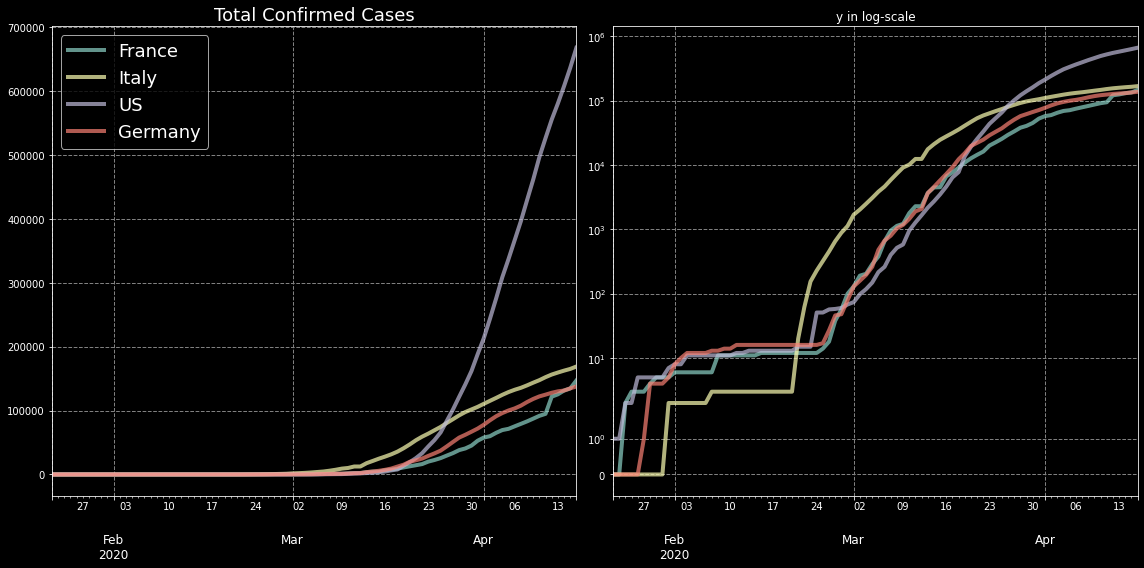

In [11]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Total Confirmed Cases', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_conf.plot(ax=ax1, lw=4, alpha=.7)
df_select_conf.plot(ax=ax2, lw=4, alpha=.7)

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

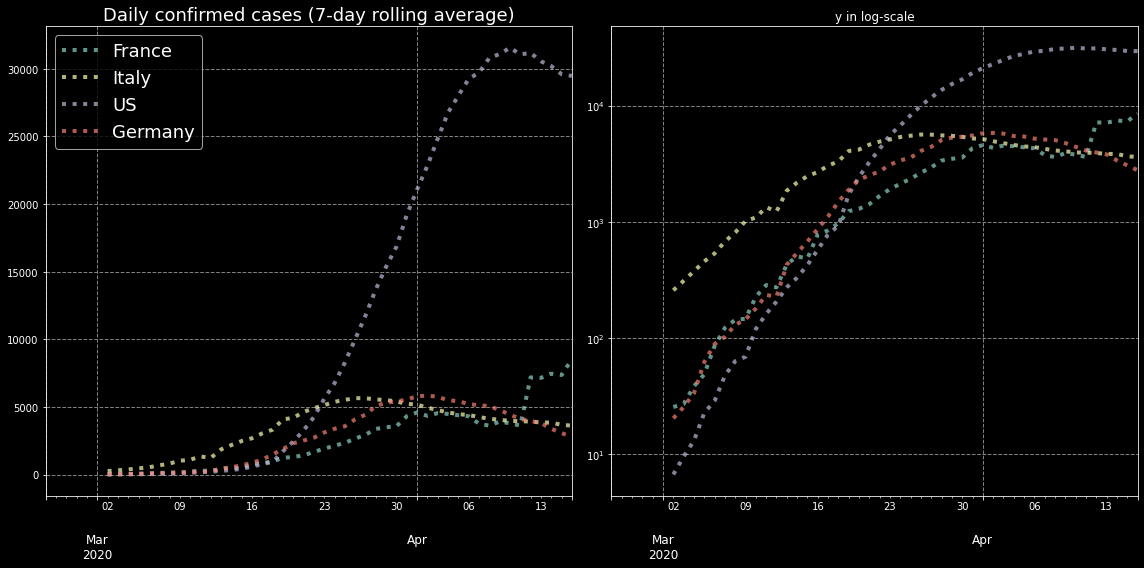

In [12]:
BEGIN_DATE = '2020-02-25'
ROLLING_MEAN_WINDOW = 7
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Daily confirmed cases (7-day rolling average)', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')

df_select_daily_conf[df_select_daily_conf.index >= BEGIN_DATE].rolling(window=ROLLING_MEAN_WINDOW).mean().plot(ax=ax1, lw=4, alpha=.7, linestyle=':')
df_select_daily_conf[df_select_daily_conf.index >= BEGIN_DATE].rolling(window=ROLLING_MEAN_WINDOW).mean().plot(ax=ax2, lw=4, alpha=.7, linestyle=':')

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

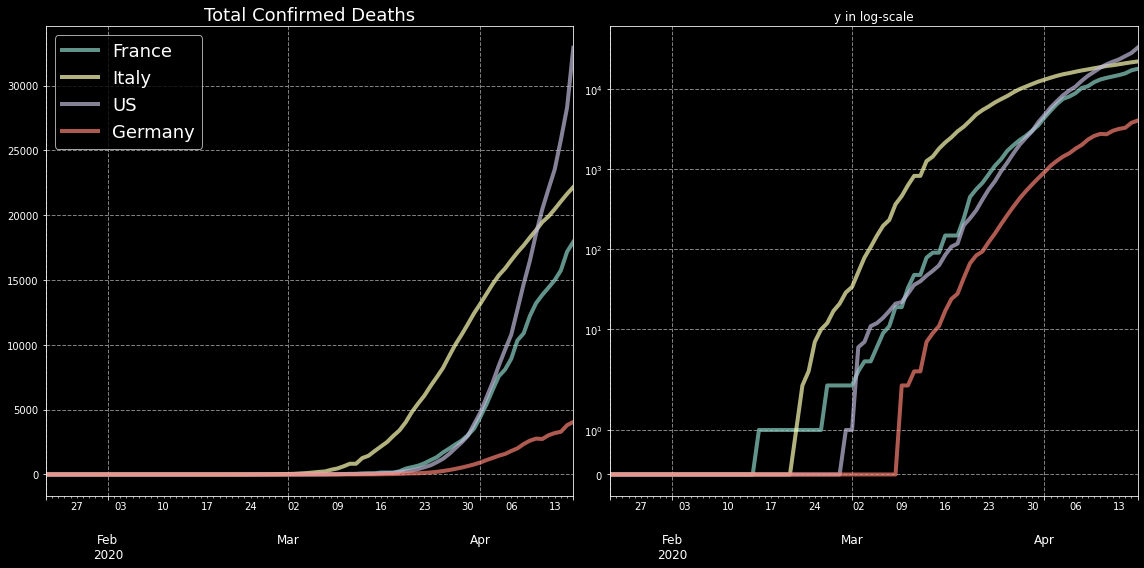

In [13]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Total Confirmed Deaths', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_death.plot(ax=ax1, lw=4, alpha=.7)
df_select_death.plot(ax=ax2, lw=4, alpha=.7)

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

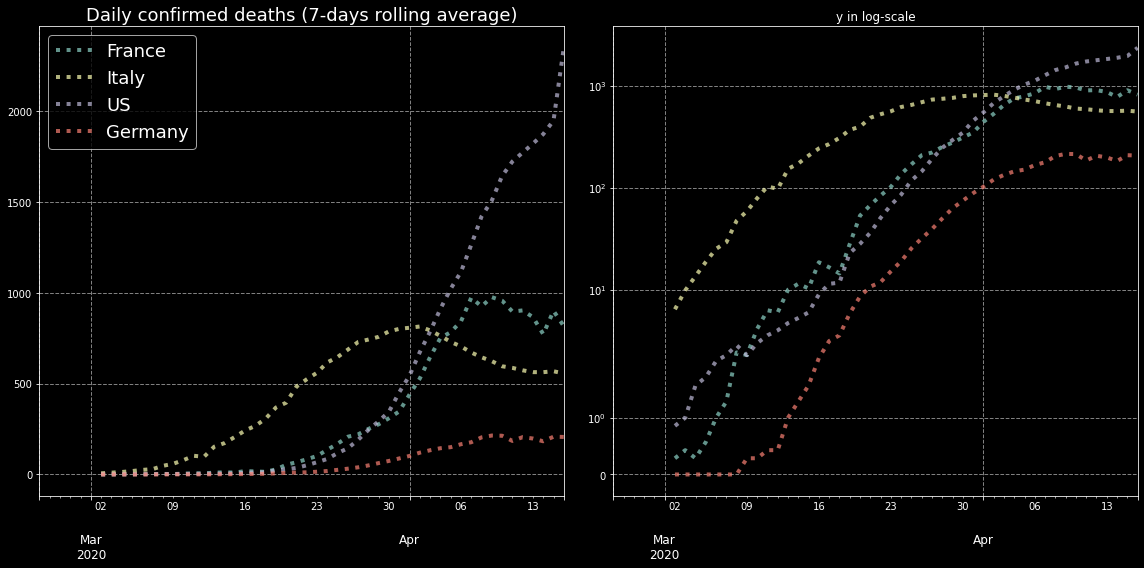

In [14]:
BEGIN_DATE = '2020-02-25'
ROLLING_MEAN_WINDOW = 7
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Daily confirmed deaths (7-days rolling average)', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_daily_death[df_select_daily_death.index >= BEGIN_DATE].rolling(window=ROLLING_MEAN_WINDOW).mean().plot(ax=ax1, lw=4, alpha=.7, linestyle=':')
df_select_daily_death[df_select_daily_death.index >= BEGIN_DATE].rolling(window=ROLLING_MEAN_WINDOW).mean().plot(ax=ax2, lw=4, alpha=.7, linestyle=':')

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

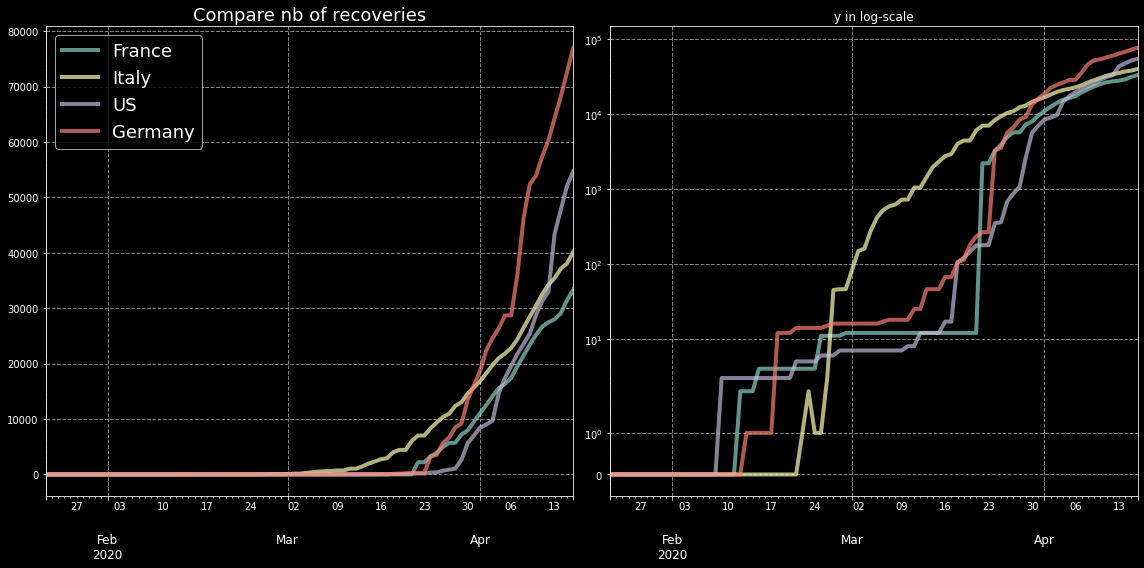

In [15]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Compare nb of recoveries', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_reco.plot(ax=ax1, lw=4, alpha=.7)
df_select_reco.plot(ax=ax2, lw=4, alpha=.7)

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

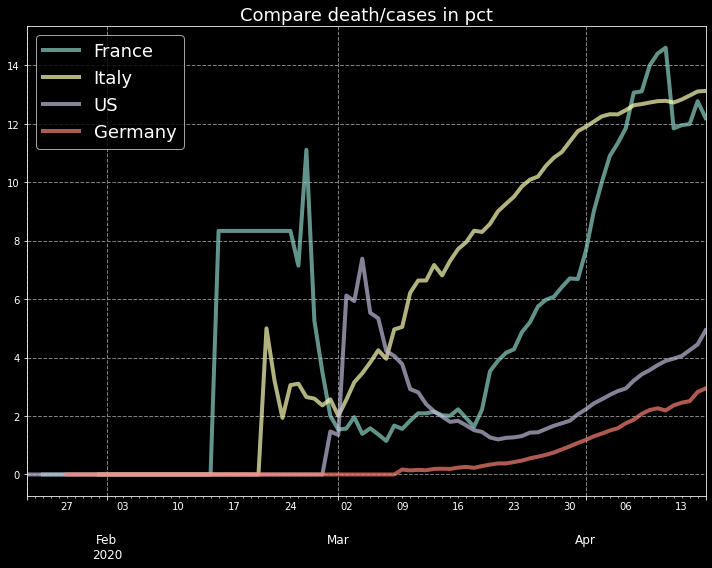

In [16]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(1, 1, 1)
plt.title('Compare death/cases in pct', size=18)

# ['03-01-2020':]
(100. * df_select_death/df_select_conf.replace(0, np.nan)).plot(ax=ax1, lw=4, alpha=.7, style='-')

adjust_plots([ax1])
plt.tight_layout()